# EDA - Example - Sales data

- Covering techniques such as Correlation matrix, outlier, missing analysis

In [1]:
import pandas as pd 

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

import numpy as np

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
sales_data = pd.read_csv("./data/SalesKaggle3.csv")

In [3]:
type(sales_data)

pandas.core.frame.DataFrame

In [4]:
sales_data.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [5]:
sales_data.tail()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
198912,208023,Active,109683,NaN,NaN,D,7,1,210186.8663,72.87,2006,54,8.46,60.59
198913,208024,Active,416462,NaN,NaN,D,8,1,455504.0650,247.00,2009,65,8.40,74.85
198914,208025,Active,658242,NaN,NaN,S,2,1,169274.5688,50.00,2012,23,23.98,32.62
198915,208026,Active,2538340,NaN,NaN,S,2,1,377526.6063,46.95,2001,23,27.42,37.89
198916,208027,Active,416662,NaN,NaN,D,15,1,118306.8275,120.00,2010,44,10.97,60.67


In [6]:
sales_data['File_Type']

0         Historical
1         Historical
2         Historical
3         Historical
4         Historical
5         Historical
6         Historical
7         Historical
8         Historical
9         Historical
10        Historical
11        Historical
12        Historical
13        Historical
14        Historical
15        Historical
16        Historical
17        Historical
18        Historical
19        Historical
20        Historical
21        Historical
22        Historical
23        Historical
24        Historical
25        Historical
26        Historical
27        Historical
28        Historical
29        Historical
             ...    
198887        Active
198888        Active
198889        Active
198890        Active
198891        Active
198892        Active
198893        Active
198894        Active
198895        Active
198896        Active
198897        Active
198898        Active
198899        Active
198900        Active
198901        Active
198902        Active
198903       

In [7]:
sales_data[sales_data['File_Type'] == 'Active']

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
75996,85107,Active,869734,NaN,NaN,S,9,1,1.251478e+06,92.82,2018,49,11.46,69.08
75997,85108,Active,3741319,NaN,NaN,S,4,1,2.407071e+06,49.00,2016,0,0.00,49.00
75998,85109,Active,3517789,NaN,NaN,S,3,1,6.890734e+06,44.95,2016,0,0.00,0.00
75999,85110,Active,1455936,NaN,NaN,S,8,1,9.156233e+04,219.00,2014,44,13.71,59.81
76000,85111,Active,2921480,NaN,NaN,S,5,1,6.922798e+06,83.95,2016,0,0.00,79.80
76001,85112,Active,862455,NaN,NaN,S,3,1,6.576754e+06,97.25,2017,0,0.00,85.95
76002,85113,Active,2238268,NaN,NaN,S,3,1,4.852005e+05,26.07,2012,32,21.97,21.87
76003,85114,Active,2348209,NaN,NaN,S,5,1,3.316372e+06,10.25,2003,16,33.00,111.46
76004,85115,Active,910476,NaN,NaN,S,7,1,2.758356e+06,125.17,2008,23,4.00,72.63
76005,85116,Active,1547664,NaN,NaN,S,2,1,1.469890e+06,48.95,2012,4,19.59,15.00


In [8]:
sales_data.describe()

,Order,SKU_number,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,1.989170e+05,75996.000000,75996.000000,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
mean,106483.543242,8.613626e+05,0.171009,0.322306,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,8.699794e+05,0.376519,1.168615,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,5.000100e+04,0.000000,0.000000,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,2.172520e+05,0.000000,0.000000,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,6.122080e+05,0.000000,0.000000,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,9.047510e+05,0.000000,0.000000,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000
max,208027.000000,3.960788e+06,1.000000,73.000000,99.000000,1.000000,1.738445e+07,12671.480000,2018.000000,2542.000000,14140.210000,19138.790000


In [9]:
print(sales_data.shape)

(198917, 14)


In [10]:
print(sales_data.nunique())

Order               198917
File_Type                2
SKU_number          133360
SoldFlag                 2
SoldCount               37
MarketingType            2
ReleaseNumber           71
New_Release_Flag         2
StrengthFactor      197424
PriceReg             11627
ReleaseYear             85
ItemCount              501
LowUserPrice         12102
LowNetPrice          15403
dtype: int64


In [11]:
print(sales_data[sales_data['File_Type'] == 'Active']['SKU_number'].count())

122921


In [12]:
# 3.1 Split the dataset into two parts based on the file_type 
sales_data_hist = sales_data[sales_data['File_Type'] == 'Historical']
sales_data_act = sales_data[sales_data['File_Type'] == 'Active']

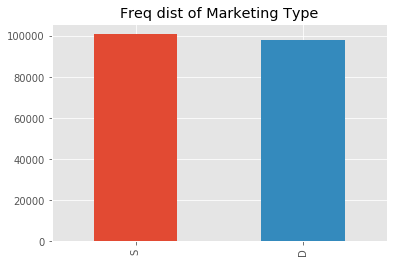

In [13]:
sales_data['MarketingType'].value_counts().plot.bar(title="Freq dist of Marketing Type")

C:\Users\vdhinakaran\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Count')

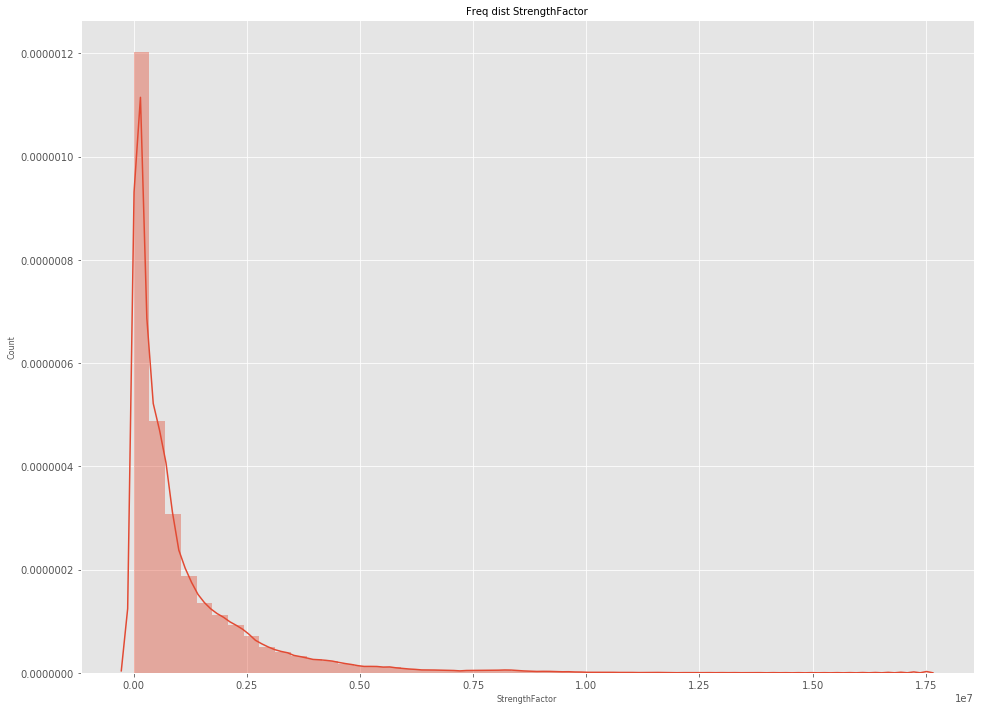

In [14]:
fig, ax = plt.subplots(1, figsize=(16,12))

sns.distplot(sales_data_act['StrengthFactor'], hist=True)

ax.set_title('Freq dist StrengthFactor', fontsize=10)
ax.set_xlabel('StrengthFactor', fontsize=8)
ax.set_ylabel('Count', fontsize=8)

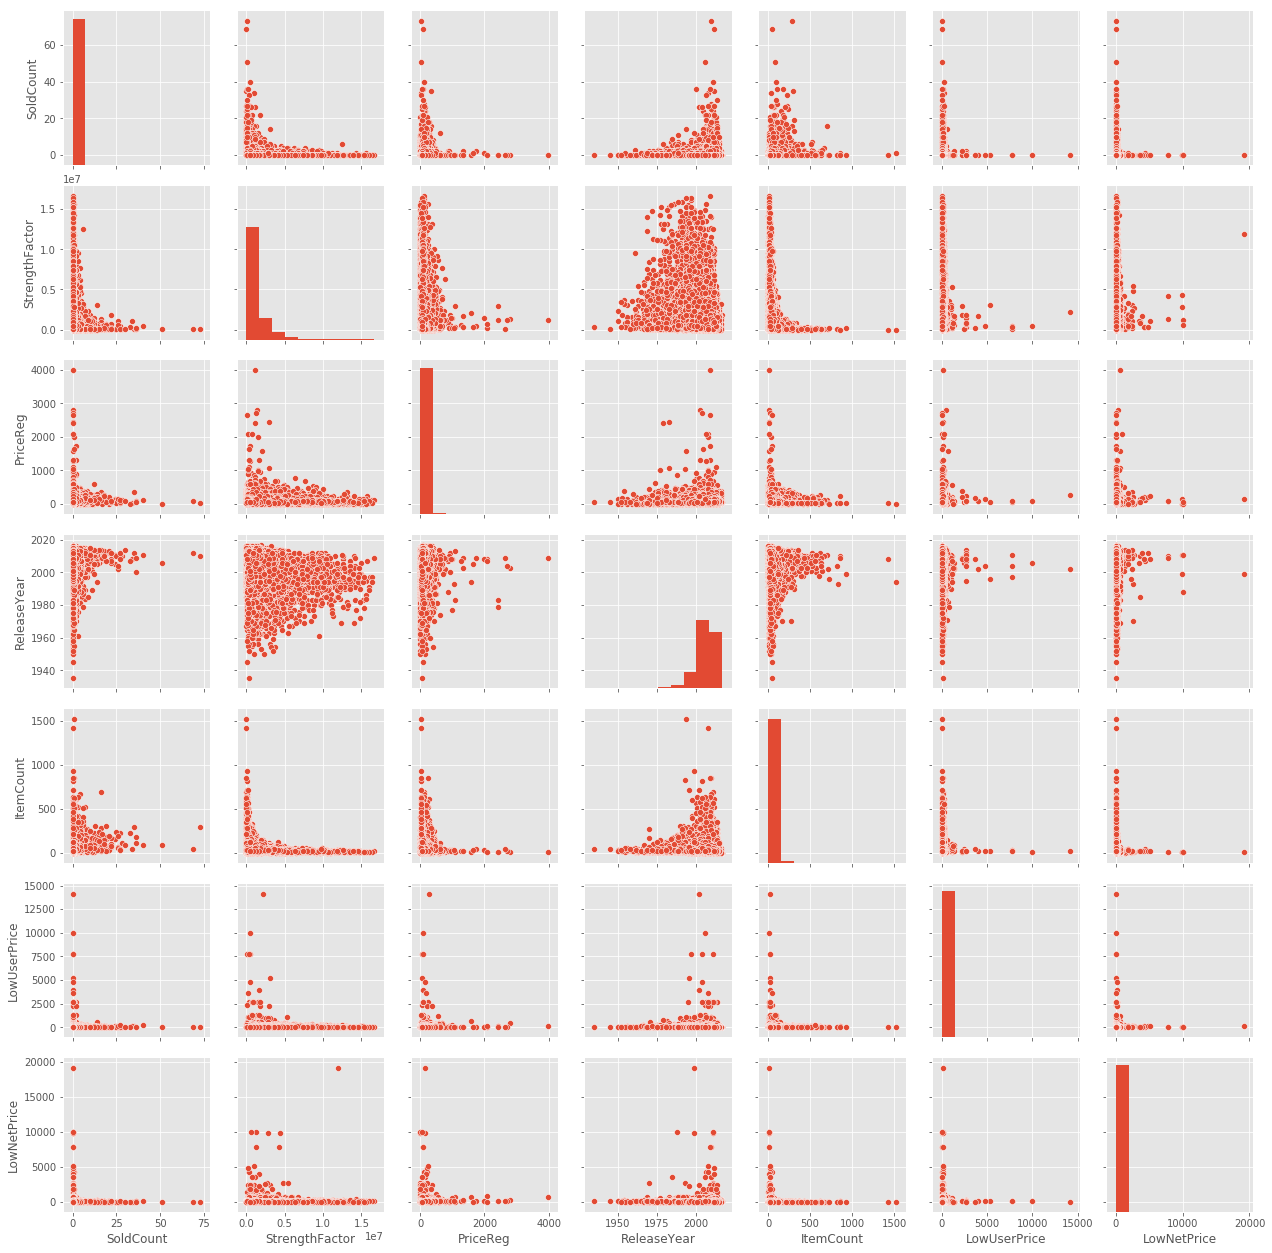

In [15]:
sales_data_hist = sales_data_hist.drop(['Order', 'File_Type','SKU_number','SoldFlag','MarketingType','ReleaseNumber','New_Release_Flag'], axis=1)
sns.pairplot(sales_data_hist)

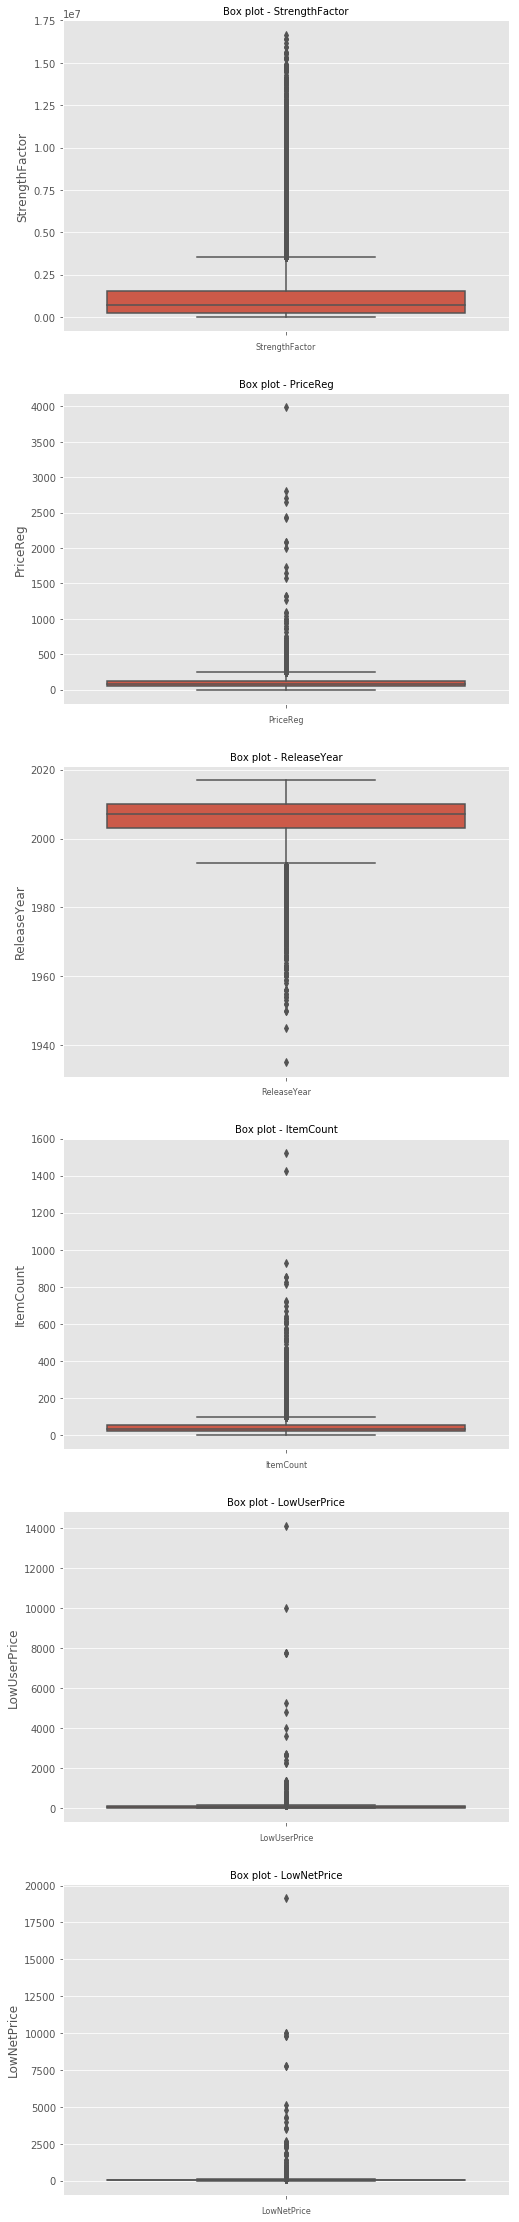

In [16]:
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
        
    sns.boxplot(y=sales_data_hist[col_val], ax=ax[i])
    ax[i].set_title('Box plot - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

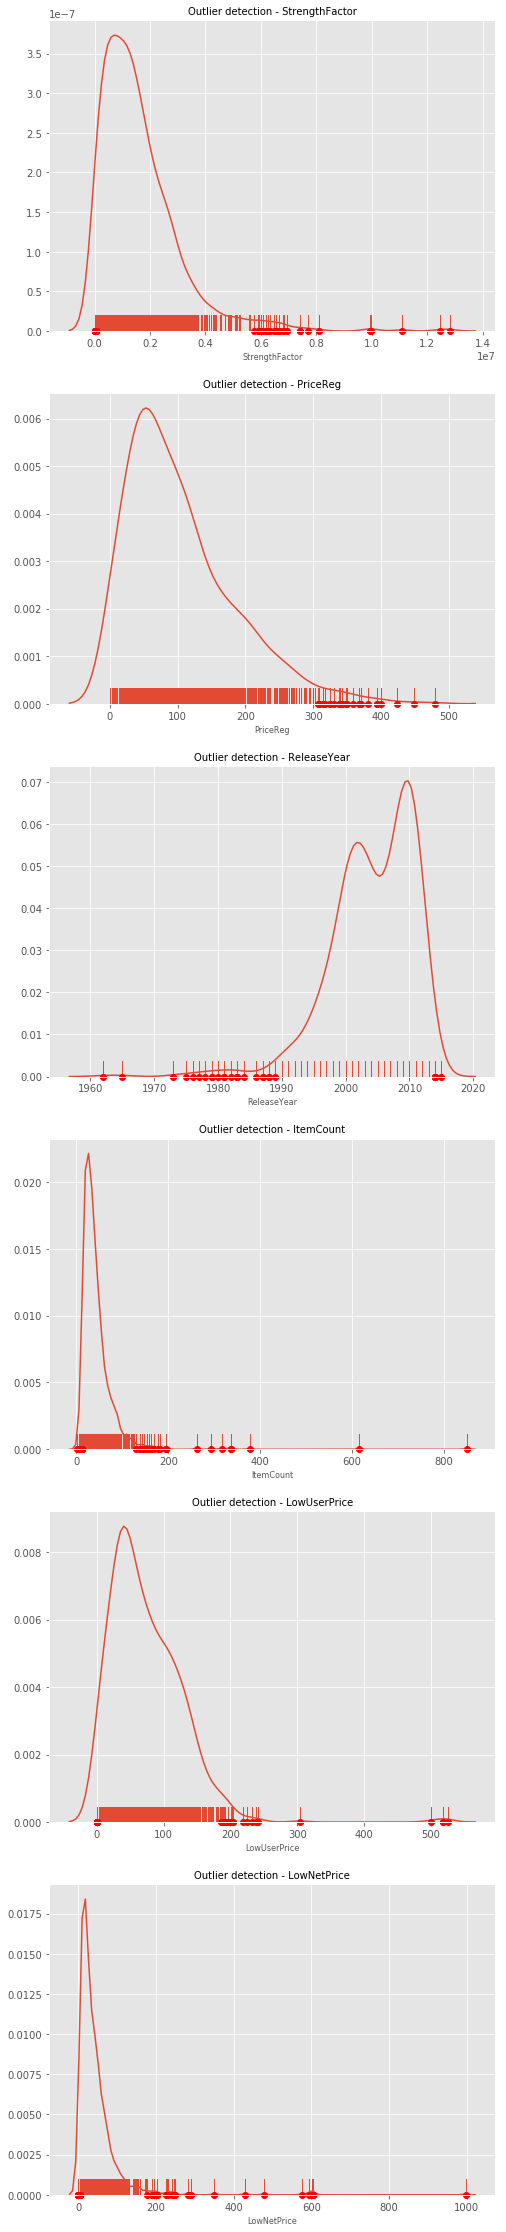

In [17]:
# Percentile based outlier removal 
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = sales_data_hist[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

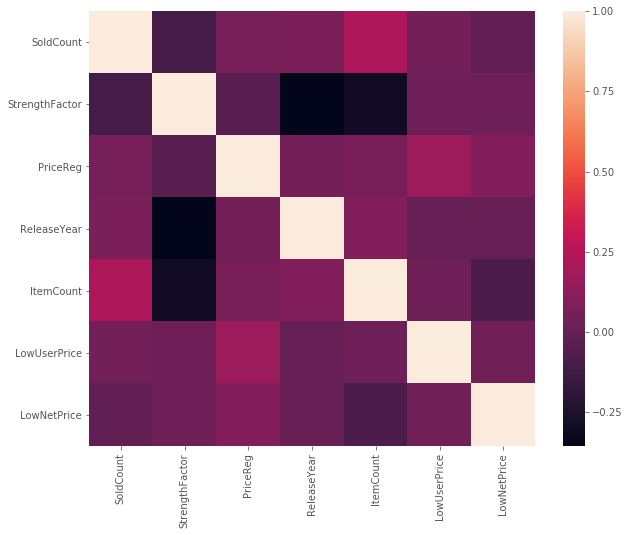

In [18]:
f, ax = plt.subplots(figsize=(10, 8))
corr = sales_data_hist.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)